<a href="https://colab.research.google.com/github/Suchada2000/BSC_DPDM23/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
shopping_data = pd.read_csv('/content/drive/MyDrive/bsc_dpdm23_data/customer_shopping_data.csv-20231129T024333Z-001.zip')


In [32]:
shopping_data

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


# ข้อมูลบางส่วนมีค่าตัวแปรบางตัวที่ไม่ทราบค่า (Missing Data)

In [5]:
shopping_data.isnull().any()

invoice_no        False
customer_id       False
gender            False
age               False
category          False
quantity          False
price             False
payment_method    False
invoice_date      False
shopping_mall     False
dtype: bool

### เราจะลบ Price ของ recods เป็น clothing cash metrocity ออก เพื่อจำลอง missing data

ตรวจสอบค่า

In [10]:
shopping_data[(shopping_data['category']!='Clothing') |
                     (shopping_data['payment_method']!='Cash') |
                     (shopping_data['shopping_mall']!='Metrocity')].describe()

,age,quantity,price
count,97173.000000,97173.000000,97173.000000
mean,43.421671,3.003931,684.423873
std,14.990459,1.413123,949.438067
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,40.660000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [8]:
shopping_data[(shopping_data['category']=='Clothing')&
                     (shopping_data['payment_method']=='Cash')&
                     (shopping_data['shopping_mall']=='Metrocity')].describe()

,age,quantity,price
count,2284.000000,2284.000000,2284.000000
mean,43.657618,2.982049,894.853275
std,14.974270,1.408979,422.806539
min,18.000000,1.000000,300.080000
25%,30.750000,2.000000,600.160000
50%,44.000000,3.000000,900.240000
75%,57.000000,4.000000,1200.320000
max,69.000000,5.000000,1500.400000


ทำให้ price missing

In [21]:
import numpy as np

In [18]:
willbemissing = shopping_data[(shopping_data['category']=='Clothing')&
                     (shopping_data['payment_method']=='Cash')&
                     (shopping_data['shopping_mall']=='Metrocity')]

In [16]:
willbemissing['prive']= np.nan

In [17]:
willbemissing

,age,quantity,price,prive
count,2284.000000,2284.000000,2284.000000,NaN
mean,43.657618,2.982049,894.853275,NaN
std,14.974270,1.408979,422.806539,NaN
min,18.000000,1.000000,300.080000,NaN
25%,30.750000,2.000000,600.160000,NaN
50%,44.000000,3.000000,900.240000,NaN
75%,57.000000,4.000000,1200.320000,NaN
max,69.000000,5.000000,1500.400000,NaN


แยก data ส่วนที่ไม่ missing ออกมา

In [19]:
nomissing=shopping_data[(shopping_data['category']!='Clothing') |
                     (shopping_data['payment_method']!='Cash') |
                     (shopping_data['shopping_mall']!='Metrocity')]

จับมันกลับมารวมกัน

In [20]:
new_shopping_data = pd.concat([willbemissing,nomissing])
new_shopping_data.shape

(99457, 10)

## Example

In [22]:
new_shopping_data

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,300.08,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,300.08,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,900.24,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,300.08,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [23]:
new_shopping_data.isnull().any()

invoice_no        False
customer_id       False
gender            False
age               False
category          False
quantity          False
price             False
payment_method    False
invoice_date      False
shopping_mall     False
dtype: bool

## Fix

### 1. ignore(ลบออกไปเลย)

Qiiz
- data หายไปกี่ %
- mean data รวมหลังจากแก้ missing เป็นเท่าไหร่

In [26]:
new_shopping_data_drop = new_shopping_data.dropna()

In [27]:
100*((len(new_shopping_data)-len(new_shopping_data_drop))/len(new_shopping_data))

0.0

# 2. เติมด้วย unknown *เราจะเติมกับข้อมูล categorical

# 3. เติมด้วยค่่าเฉลี่ย

quiz
- mean ใหม่จะเป็นเท่าไหร่

In [30]:
mean_val = new_shopping_data_drop['price'].mean()

In [36]:
new_shopping_data_fillmean = newfillna({'price':mean_val})

NameError: ignored

In [37]:
new_shopping

NameError: ignored

# 4. เติมด้วยค่าเฉลี่ยของกลุ่ม

quiz
- mean หลังเติมด้วยค่าเฉลี่ย clothing
- mean หลังเติมด้วยค่าเฉลี่ย cash
- mean หลังเติมด้วยค่าเฉลี่ย megacity
- mean หลังเติมด้วยค่าเฉลี่ย cash+megacity

In [39]:
new_shopping_data[new_shopping_data['category']=='Clothing']['price'].mean()

901.0840212253892

In [ ]:
new_shopping_data_fillcash = new_shopping_data.fillna({'price':new_shopping_data[new_shopping_data['payment_method']=='Clothing']['price'].mean()'})

In [ ]:
new_shopping_data_fillcash = new_shopping_data.fillna({'price':new_shopping_data[new_shopping_data['payment_method']=='Clothing']['price'].mean()'})

In [ ]:
new_shopping_data[new_shopping_data['category']=='Clothing']['price'].mean()

# ข้อมูลมีความซ้ำซ้อน (Duplicate Data)

In [40]:
willbedup = shopping_data[(shopping_data['category']=='Clothing')&
                     (shopping_data['payment_method']=='Cash')&
                     (shopping_data['shopping_mall']=='Metrocity')]

In [41]:
new_shopping_dup = pd.concat([shopping_data,willbedup])

In [43]:
new_shopping_dup.shape

(101741, 10)

In [47]:
new_shopping_dup = new_shopping_dup.sort_value(bye='invoice_data')

AttributeError: ignored

## Example

In [48]:
new_shopping_dup.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
98987     True
99153     True
99178     True
99339     True
99390     True
Length: 101741, dtype: bool

## Fix

# ข้อมูลบางตัวในชุดข้อมูลมีลักษณะผิดปกติหรือแตกต่างจากข้อมูลส่วนใหญ่ (Outlier)

In [49]:
from matplotlib import pyplot as plt

## Example

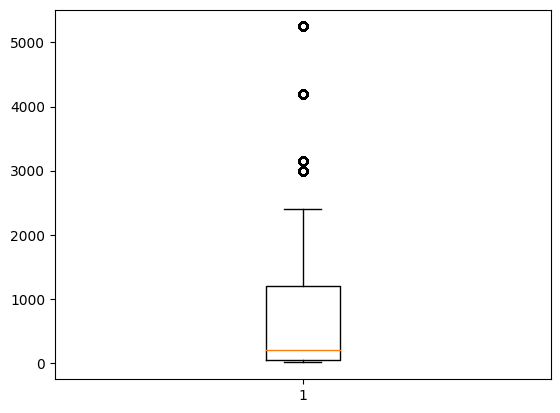

In [53]:
ret = plt.boxplot(shopping_data['price']);

In [54]:
ret['whiskers'][0].get_ydata()

array([45.45,  5.23])

In [55]:
ret['whiskers'][1].get_ydata()

array([1200.32, 2400.68])

In [52]:
ret['fliers''][0].get_y_data

NameError: ignored

## Fix

In [56]:
ret['whiskers'][1].get_ydata(1)

array([1200.32, 2400.68])

In [ ]:
shopping_data[shopping_data][price]

# ค่าตัวแปรบางตัวที่ไม่ถูกต้อง (Erroneous Data)

## Example

## Fix

# ข้อมูลมีค่าตัวแปรไม่สอดคล้องซึ่งกันและกัน (Inconsistent)

## Example

## Fix